# <span style="color: white; background-color: green; padding: 10px;">**Proyecto Final - Fundamentos 2024 II**</span>


## **Integrantes**
        Cristian Jiménez         CC 1020460089
        Juan Felipe Quinto Rios  CC 1041152117
        Veronica Arango Toro     CC 1039473234



# **Conjunto de Datos: Ventas de Casas por RealAgents**

## Resumen 
El conjunto de datos se refiere a las ventas de casas realizadas por RealAgents, una empresa inmobiliaria especializada en la venta de varios tipos de casas dentro de un área metropolitana específica. El objetivo principal de RealAgents es optimizar los precios de lista de las casas para reducir el tiempo que toma venderlas. Al predecir el precio de venta de las casas en función de sus características, la empresa busca mantenerse competitiva en el mercado.

## Estructura de los Datos

| **Nombre de la Columna** | **Descripción**                                                                                               | **Tipo de Datos**         |
|--------------------------|---------------------------------------------------------------------------------------------------------------|---------------------------|
| `house_id`                | Identificador único para cada casa en el conjunto de datos.                                                   | Nominal (Categórico)      |
| `city`                    | La ciudad donde se encuentra la casa. Los valores posibles son 'Barrowford', 'Frodsham', 'Sandbach' y 'Yarm'. | Nominal (Categórico)      |
| `sale_price`              | El precio de venta de la casa, expresado en dólares completos.                                                | Discreto (Numérico)       |
| `sale_date`               | La fecha en que la casa se vendió por última vez.                                                             | Discreto (Fecha)          |
| `months_listed`           | El número de meses que la casa estuvo en el mercado antes de ser vendida, redondeado a un decimal.            | Continuo (Numérico)       |
| `bedrooms`                | El número de habitaciones en la casa.                                                                         | Discreto (Numérico)       |
| `house_type`              | Tipo de casa: "Terraced" (dos paredes compartidas), "Semi-detached" (una pared compartida), o "Detached" (sin paredes compartidas). | Ordinal (Categórico)      |
| `area`                    | El área de la casa en metros cuadrados, redondeado a un decimal.                                             | Continuo (Numérico)       |

## Uso de los Datos
Los datos se utilizarán para desarrollar modelos predictivos que estimen el precio de venta de las casas en función de sus atributos. Al predecir con precisión los precios de venta, RealAgents puede ajustar los precios de lista para minimizar el tiempo que una casa permanece en el mercado, mejorando así la eficiencia general de las ventas.


---

## Analisis Exploratorio de los datos

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = 'house_sales_CZE.csv'
df_house_sales = pd.read_csv(file_path)
df_house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Pilsen,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Pilsen,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Karlovy Vary,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Pilsen,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Pilsen,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [3]:
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


### Corrección de tipos de datos 

Asignamos a la columan moth_listed el Dtype de tiempo 

In [4]:
df_house_sales['sale_date'] = pd.to_datetime(df_house_sales['sale_date'], format='%Y-%m-%d')
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1469 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 93.9+ KB


Se eliminaron las unidades de la variable area 'sq.m.' y se actulizó a tipo de dato float

In [5]:
df_house_sales['area'] = df_house_sales['area'].str.replace(' sq.m.', '').astype(float)
mean_area = df_house_sales['area'].mean().round(1)
df_house_sales['area'].fillna(mean_area, inplace=True)
df_house_sales['area'] = df_house_sales['area'].round(1)
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1469 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 93.9+ KB


Al identificar los datos de tipo objetc, verificamos sus valores unicos 

In [6]:
# Filtrar las columnas de tipo 'object'
object_columns = df_house_sales.select_dtypes(include=['object']).columns

# Identificar los valores únicos en cada columna de tipo 'object'
unique_values = {col: df_house_sales[col].unique() for col in object_columns}

# Imprimir los valores únicos
for col, values in unique_values.items():
    print(f"Valores únicos en la columna '{col}': {values}")

Valores únicos en la columna 'city': ['Pilsen ' 'Karlovy Vary' 'České Budějovice' 'Regensburg ' '--']
Valores únicos en la columna 'house_type': ['Semi-detached' 'Detached' 'Det.' 'Terraced' 'Semi' 'Terr.']


En la columna 'city' se reemplaron los valos con '--' por 'Unknown'

In [7]:
# Replace '--' with 'Unknown' in the 'city' column
df_house_sales['city'].replace('--', 'Unknown', inplace=True)

# Get discrete values in the 'city' column
discrete_values = df_house_sales['city'].value_counts()
print(discrete_values)

city
Pilsen              517
České Budějovice    366
Regensburg          362
Karlovy Vary        182
Unknown              73
Name: count, dtype: int64


Se creo un difinio un diccionario para renombrar o mapear las caracteristica abreviadas en la columna de house_type

In [8]:
# Define a mapping dictionary to unify the house types
mapping = {
    'Detached': 'Detached', 
    'Det.': 'Detached',
    'Semi-detached': 'Semi-detached',
    'Semi': 'Semi-detached',
    'Terraced': 'Terraced',
    'Terr.': 'Terraced'
}

#Detached : No comparte paredes con otra casa
#Semi-detached : Comparte al menos un muro con otra casa
#Terraced : Que se encuentra entre casas


# Apply the mapping to the house_type column
df_house_sales['house_type'] = df_house_sales['house_type'].map(mapping)

# Check the result
df_house_sales['house_type'].value_counts()


house_type
Detached         1124
Semi-detached     245
Terraced          131
Name: count, dtype: int64

Se mira la distrubucion de la columna 'months_listed'debido a que esta tiene valores faltantes, que requieren ser imputados 

<Axes: >

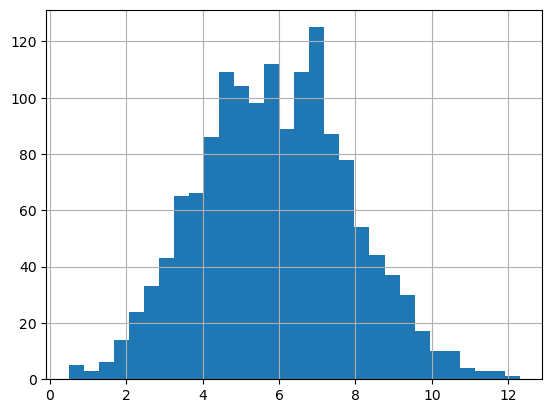

In [9]:
df_house_sales['months_listed'].hist(bins=30)

Se observa no hay suficiente prevalencia de valores extremos, y por tal motivo se utiliza la media (mean) para relizarla imputacion de los datos 

In [10]:
mean_months_listed = df_house_sales['months_listed'].mean().round(1)
df_house_sales['months_listed'].fillna(mean_months_listed, inplace=True)

df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1500 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 93.9+ KB


Se realiza un analisis visual de la distribucion de las variables y sus correlaciones 

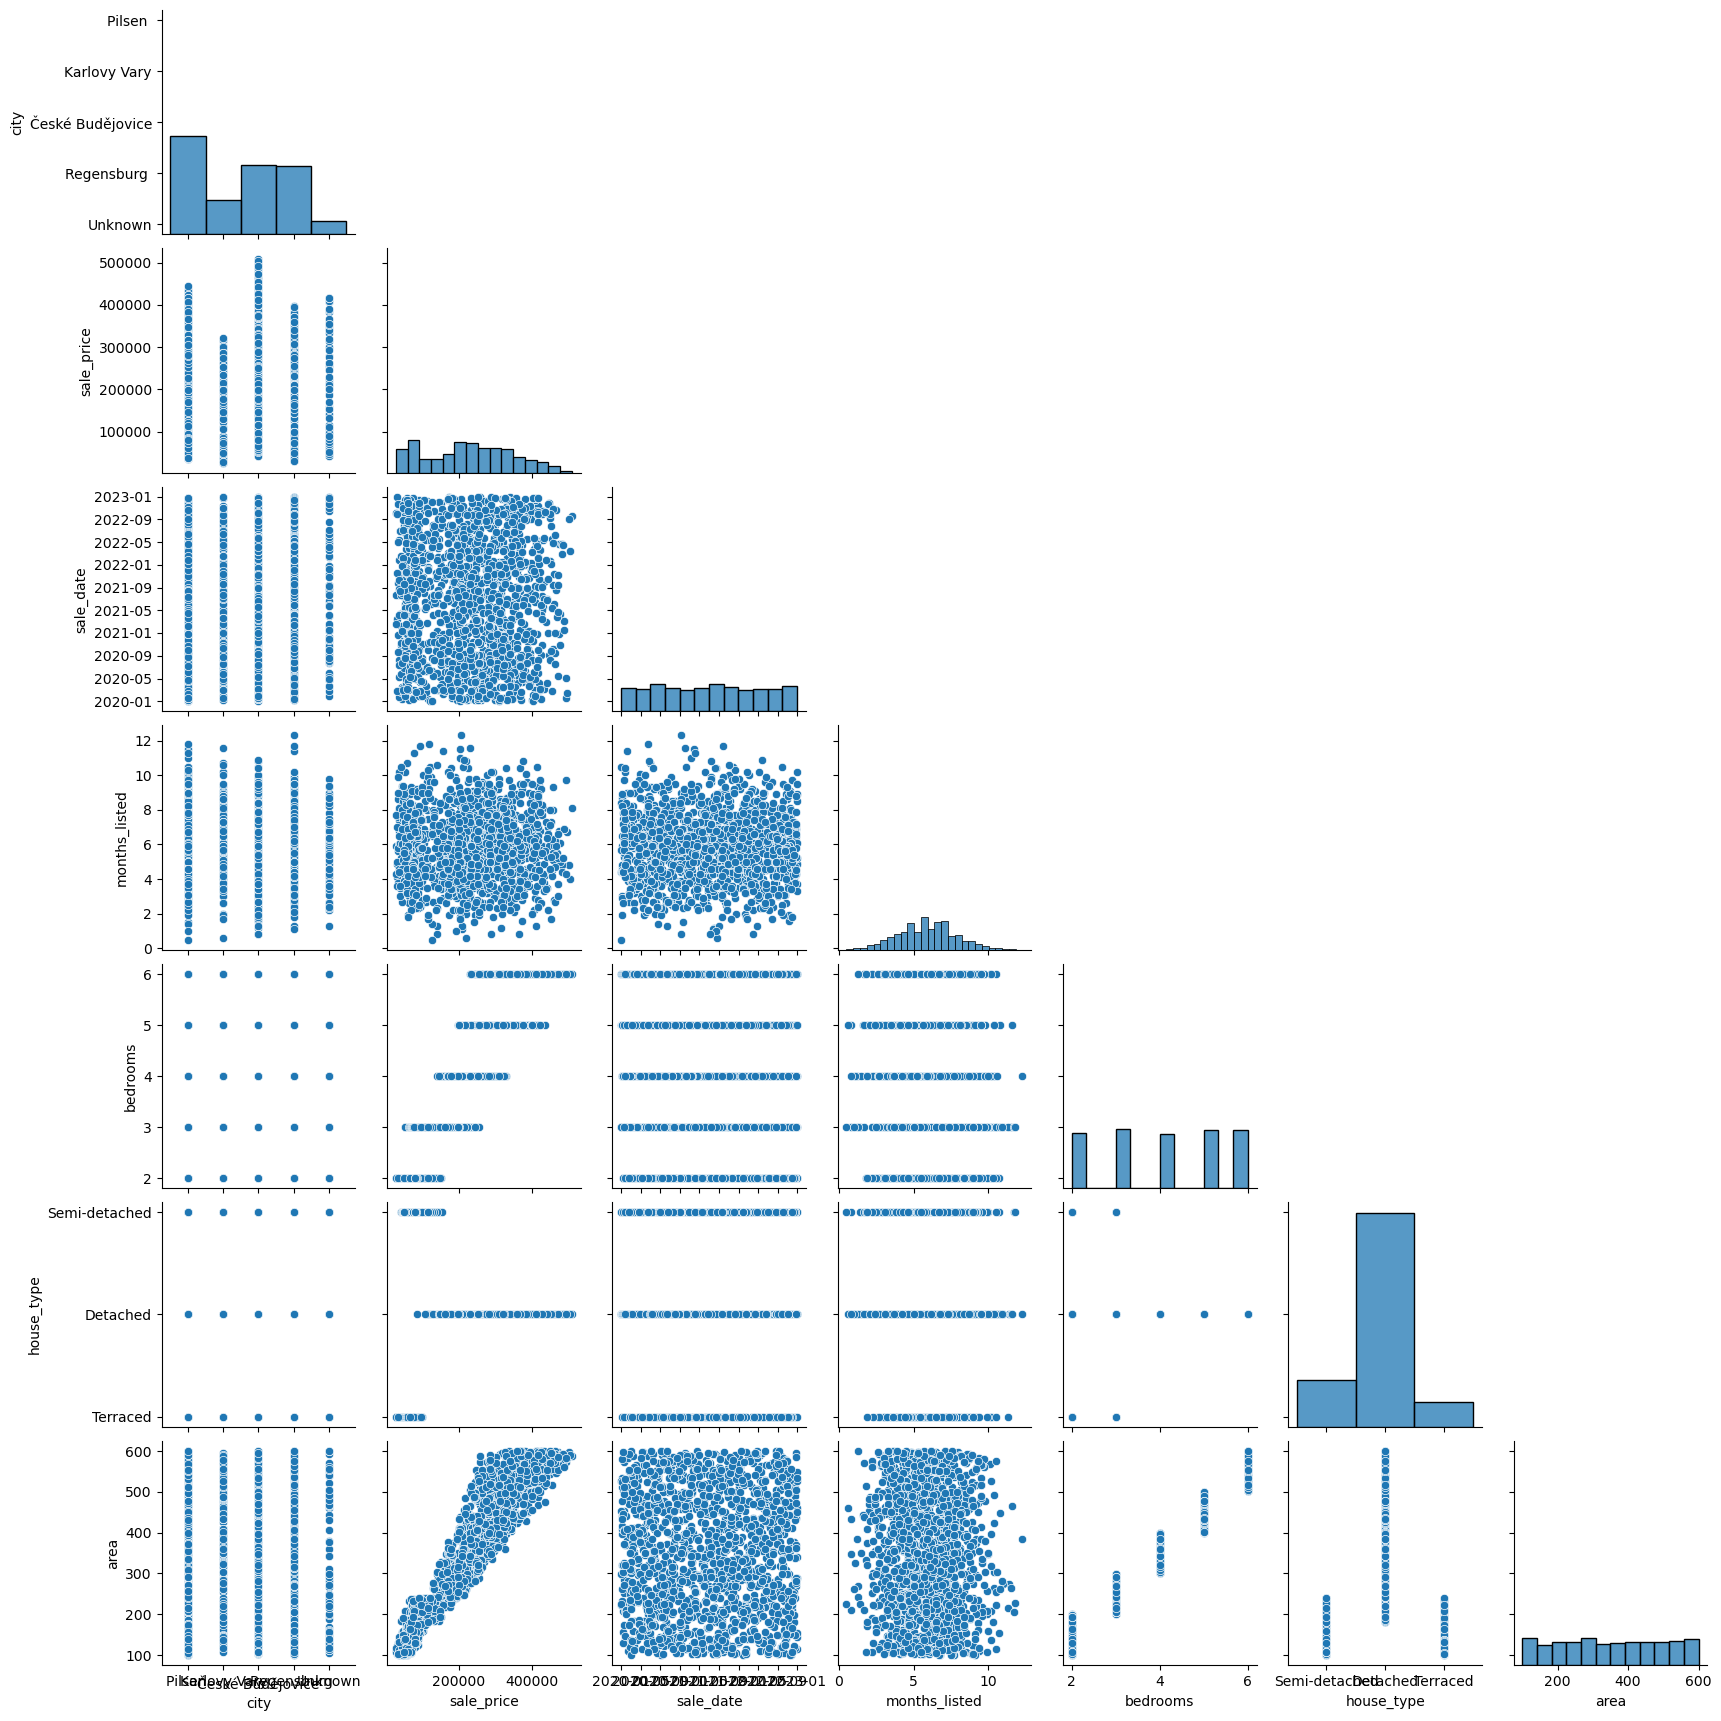

In [11]:
#import seaborn as sns
#
lista_de_columnas = df_house_sales.columns.drop('house_id', 'sale_date')
lista_de_columnas
g = sns.pairplot(df_house_sales, vars=lista_de_columnas)
# Ocultar la parte superior de la matriz
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

RESULT - Final DataFrame 

In [12]:
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1500 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 93.9+ KB


Se añade una nueva variable al df que hace referencia al precio por m2 

In [13]:
df_house_sales['price_m2'] = (df_house_sales['sale_price']/df_house_sales['area']).round(2)
df_house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area,price_m2
0,1217792,Pilsen,55943,2021-09-12,5.4,2,Semi-detached,107.8,518.95
1,1900913,Pilsen,384677,2021-01-17,6.3,5,Detached,498.8,771.20
2,1174927,Karlovy Vary,281707,2021-11-10,6.9,6,Detached,542.5,519.28
3,1773666,Pilsen,373251,2020-04-13,6.1,6,Detached,528.4,706.38
4,1258487,Pilsen,328885,2020-09-24,8.7,5,Detached,477.1,689.34


Nos interesa conocer cual es la ciudad más costosa y su precio promedio por m2

In [14]:
city_avg_price_m2 = df_house_sales.groupby('city')['price_m2'].mean()
most_expensive = city_avg_price_m2.idxmax()
highets_price = round(city_avg_price_m2.max(),2)

print(f"La ciudad más costosa es {most_expensive} y su premedio mas alto del valor m2 es {highets_price}")

La ciudad más costosa es České Budějovice y su premedio mas alto del valor m2 es 732.59


Queremos comparar el tiempo promedio en meses de dos conjuntos, las casas más baratas y más costosas con respecto a la media 

In [15]:
one = df_house_sales[df_house_sales['sale_price'] > df_house_sales.sale_price.mean()]
two = df_house_sales[df_house_sales['sale_price'] < df_house_sales.sale_price.mean()]

print(one.months_listed.mean())

print(two.months_listed.mean())


5.852506596306069
5.951482479784366


Nos interesa conocer la frencia de venta de las casas según el mes

In [16]:
#import matplotlib.pyplot as plt
#df_house_sales['months'] = df_house_sales['sale_date'].dt.month_name()

#plt.hist(df_house_sales['months'], bins=10, edgecolor='black')
#plt.xticks(rotation=45);

Nos interesa conocer el precio promedio de las casas de acuerdo con el número de habitaciones 

In [17]:
#Group by number of bedrooms and calculate average price and variance
grouped = df_house_sales.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).reset_index()

# Rename columns to match the required output
grouped.columns = ['bedrooms', 'avg_price', 'var_price']

# Round the values to 1 decimal place
grouped = grouped.round(1)

price_by_rooms = grouped

price_by_rooms.head()

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


---


# Modelo de predicion de precios



In [18]:
#import matplotlib.pyplot as plt
#import seaborn as sns


In [19]:
df_house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area,price_m2
0,1217792,Pilsen,55943,2021-09-12,5.4,2,Semi-detached,107.8,518.95
1,1900913,Pilsen,384677,2021-01-17,6.3,5,Detached,498.8,771.20
2,1174927,Karlovy Vary,281707,2021-11-10,6.9,6,Detached,542.5,519.28
3,1773666,Pilsen,373251,2020-04-13,6.1,6,Detached,528.4,706.38
4,1258487,Pilsen,328885,2020-09-24,8.7,5,Detached,477.1,689.34


In [20]:
df_house_sales = df_house_sales.drop(['house_id', 'sale_date', 'months_listed'], axis=1)
df_house_sales

,city,sale_price,bedrooms,house_type,area,price_m2
0,Pilsen,55943,2,Semi-detached,107.8,518.95
1,Pilsen,384677,5,Detached,498.8,771.20
2,Karlovy Vary,281707,6,Detached,542.5,519.28
3,Pilsen,373251,6,Detached,528.4,706.38
4,Pilsen,328885,5,Detached,477.1,689.34
...,...,...,...,...,...,...
1495,Karlovy Vary,198661,5,Detached,432.2,459.65
1496,Regensburg,358304,6,Detached,599.8,597.37
1497,Karlovy Vary,176612,4,Detached,359.1,491.82
1498,České Budějovice,197827,3,Detached,253.7,779.77


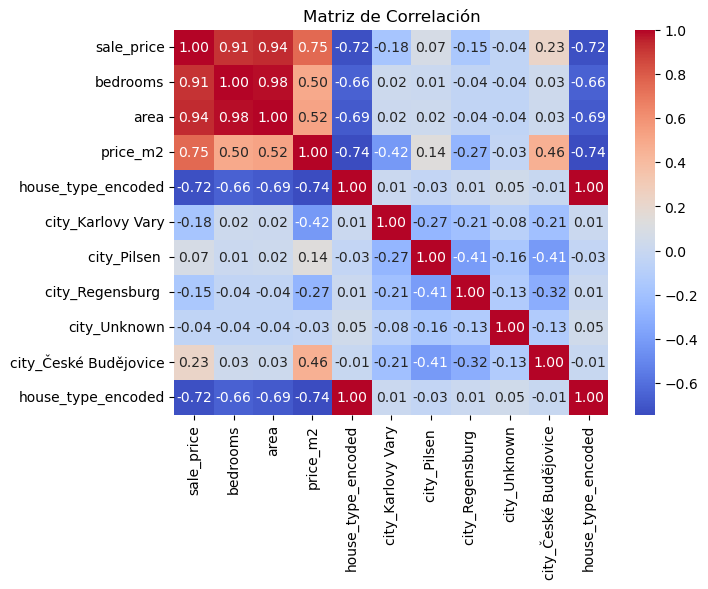

In [21]:
# Convertir la columna 'house_type' usando LabelEncoder
label_encoder = LabelEncoder()
df_house_sales['house_type_encoded'] = label_encoder.fit_transform(df_house_sales['house_type'])

# Convertir la columna 'city' en variables dummy
df_city_dummies = pd.get_dummies(df_house_sales['city'], prefix='city')

# Concatenar las variables dummy de 'city' al DataFrame original
df_encoded = pd.concat([df_house_sales.drop(['city', 'house_type'], axis=1), df_city_dummies, df_house_sales[['house_type_encoded']]], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Finalmente, visualiza la matriz de correlación
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Convertir las variables categóricas a variables dummy
df_house_sales_encoded = pd.get_dummies(df_house_sales, columns=['city', 'house_type'], drop_first=True)

# Definir las variables predictoras y la variable objetivo
X = df_house_sales_encoded[['area'] + list(df_house_sales_encoded.columns[df_house_sales_encoded.columns.str.startswith('city_') | df_house_sales_encoded.columns.str.startswith('house_type_')])]
y = df_house_sales['sale_price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {round(mse**0.5,2)}")
print(f"R²: {round(r2,2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape*100, 2)}%")


Mean Squared Error: 22071.84
R²: 0.96
Mean Absolute Percentage Error (MAPE): 13.48%


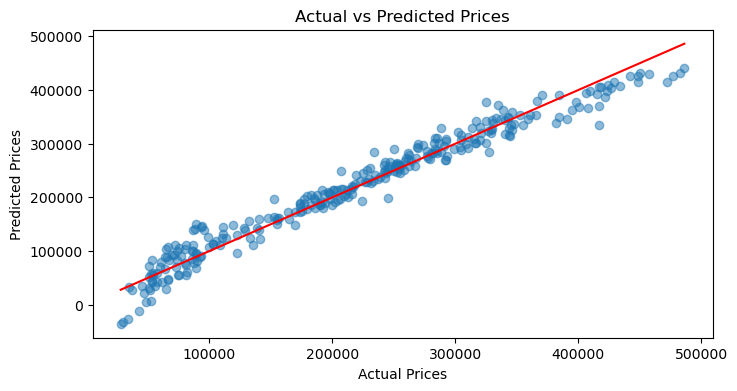

In [23]:
# Visualize the results: Actual vs. Predicted Prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb

# Convertir las variables categóricas a variables dummy
df_house_sales_encoded = pd.get_dummies(df_house_sales, columns=['city', 'house_type'], drop_first=True)

# Definir las variables predictoras y la variable objetivo
X = df_house_sales_encoded[['area'] + list(df_house_sales_encoded.columns[df_house_sales_encoded.columns.str.startswith('city_') | df_house_sales_encoded.columns.str.startswith('house_type_')])]
y = df_house_sales['sale_price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {round(mse**0.5,2)}")
print(f"R²: {round(r2,2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape*100,2)}%")


Mean Squared Error: 19781.25
R²: 0.97
Mean Absolute Percentage Error (MAPE): 5.78%


Se grafican los varoles actuales vs los predecidos, mediante un scatter plot 

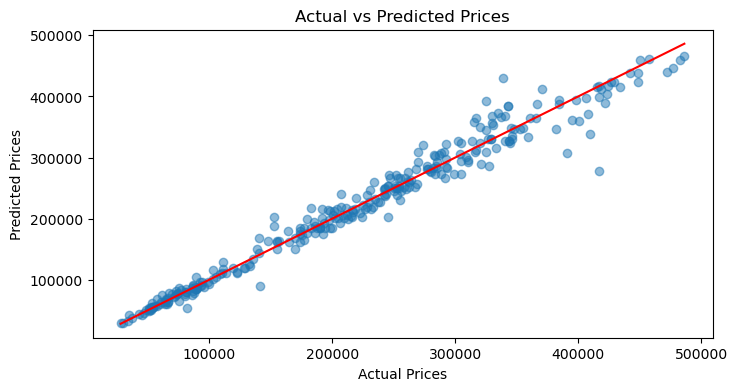

In [25]:
# Visualize the results: Actual vs. Predicted Prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()